# Project: Wrangling and Analyze Data

In [1]:
# import packages
import pandas as pd
import requests
import numpy as np
import json
import tweepy
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response

<Response [200]>

In [5]:
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [6]:
image_predections= pd.read_csv('image-predictions.tsv', sep='\t')
image_predections.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX' 
access_token = 'XXXXXXX-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

auth= tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [8]:
# list of tweets available
df_list = []
# tweets unavailable
e_list = []
tweet_id = twitter_archive['tweet_id']


for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode='extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)})
    
    except Exception as e:
        e_list.append(id)

In [9]:
# save it in a file
tweet_count = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])
tweet_count.to_csv('tweet_json.txt', encoding = 'utf-8')

In [10]:
tweet_count.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,33722,6978
1,892177421306343426,29250,5279
2,891815181378084864,21985,3465
3,891689557279858688,36817,7198
4,891327558926688256,35202,7722


## Assessing Data

In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.



In [11]:
#Made copies of three tables
archive_copy=twitter_archive.copy()
image_pred_copy=image_predections.copy()
count_copy=tweet_count.copy()

In [13]:
archive_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
803,772152991789019136,NaN,NaN,2016-09-03 19:23:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a couple rufferees making sure all the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772152991...,10,10,None,None,None,None,None
658,791672322847637504,NaN,NaN,2016-10-27 16:06:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says you're a good boy and you know y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
811,771171053431250945,NaN,NaN,2016-09-01 02:21:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Frankie. He's wearing b...,6.733201e+17,4.196984e+09,2015-12-06 01:56:44 +0000,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
1979,672980819271634944,NaN,NaN,2015-12-05 03:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extraordinary dog here. Looks large. Just a he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672980819...,5,10,None,None,None,None,None
2123,670385711116361728,NaN,NaN,2015-11-27 23:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,8,10,Larry,None,None,None,None
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeus. He's downright fabulous. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715680795...,12,10,Zeus,None,None,None,None
428,821149554670182400,NaN,NaN,2017-01-17 00:18:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luca. He got caught howling. H*ckin em...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821149554...,12,10,Luca,None,None,None,None
913,757400162377592832,NaN,NaN,2016-07-25 02:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",She walks herself up and down the train to be ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757400162...,13,10,None,None,None,None,None
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
846,766313316352462849,NaN,NaN,2016-08-18 16:38:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He has legendary eyebrows and h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766313316...,12,10,Oscar,None,None,None,None


In [14]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
archive_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
image_pred_copy.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False
215,670055038660800512,https://pbs.twimg.com/media/CUyDgChWUAAmNSI.jpg,1,snail,0.563631,False,slug,0.296649,False,bolete,0.031839,False
527,676617503762681856,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1,Chihuahua,0.841084,True,Pomeranian,0.120530,True,Pekinese,0.006600,True
1979,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False
1402,768970937022709760,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,Pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False
143,668620235289837568,https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg,1,crash_helmet,0.757942,False,toaster,0.037497,False,mouse,0.027271,False
1618,802572683846291456,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,1,golden_retriever,0.610171,True,Labrador_retriever,0.173252,True,cocker_spaniel,0.163257,True
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,1,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True


In [17]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_pred_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
count_copy.sample(10)

,tweet_id,favorites,retweet_count
819,766693177336135680,3785,727
1814,675853064436391936,2415,1132
1656,681679526984871937,1627,399
513,808001312164028416,11819,3296
1171,716791146589110272,7744,1457
1969,672538107540070400,900,316
525,805932879469572096,7863,1796
31,886054160059072513,0,93
158,860177593139703809,0,26640
784,772102971039580160,3762,862


In [20]:
count_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id         2327 non-null int64
favorites        2327 non-null int64
retweet_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [21]:
count_copy.describe()

,tweet_id,favorites,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7032.744736,2460.930382
std,6.820795e+16,10928.629742,4168.016434
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1221.000000,492.500000
50%,7.178418e+17,3041.000000,1147.000000
75%,7.986547e+17,8573.000000,2847.000000
max,8.924206e+17,144388.000000,70421.000000


In [22]:
archive_copy.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Toby           7
Daisy          7
Buddy          7
Bailey         7
Dave           6
Rusty          6
Stanley        6
Leo            6
Bella          6
Oscar          6
Scout          6
Milo           6
Jack           6
Koda           6
Jax            6
Bentley        5
            ... 
William        1
Jeffrie        1
Schnozz        1
Scruffers      1
Tommy          1
Jarod          1
such           1
Suki           1
Sailor         1
Grizzwald      1
Burt           1
Tater          1
Bonaparte      1
Pumpkin        1
Erik           1
Izzy           1
Beckham        1
Peanut         1
Trevith        1
Kendall        1
Shadoe         1
Batdog         1
Jonah          1
Bowie          1
Pilot          1
Mutt           1
Ulysses        1
Tove          

In [23]:
# rating_denominator values
archive_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
# rating_numerator values
archive_copy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
# source of tweets
archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
archive_copy.query('rating_denominator != 10')['text']

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

In [27]:
# how many image predictions are not dogs?
image_pred_copy.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

### Quality issues

Completeness

1.From archive_c, find and replace dog names with 'None' if possible. It appears that names that are lowercase tend to be invalid. Find and replace lowercase dog "names" if possible. Replace with NaN if no name is found.

2.Drop retweeted columns from archive_c table

3.Drop in_reply_to_status_id and in_reply_to_user_id

4.classify archives source column in four observed sources

5.Change the rating_numerator and rating_denominator for oberservations with wrong value or drop them if necessary. 

6.Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator

7.Change datatypes of timestamp to datetime, and tweet_id, to strings.

8.Drop all three false row prediction

9.Source displays url




### Tidiness issues
1. Dog "stage" variable in four columns: doggo, floofer, pupper, puppo

2. Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

3. Create top accurate predicted dog breed in a column and drop p1,p2,p3 related columns


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

## Make copies of original Data

In [28]:
#Made copies of three tables
archive_c=twitter_archive.copy()
image_pred_c=image_predections.copy()
count_c=tweet_count.copy()

#### Define:

From archive_c, find and replace dog names with 'None' if possible.
It appears that names that are lowercase tend to be invalid. Find and replace lowercase dog "names" if possible.
Replace with NaN if no name is found.

#### Code



In [29]:
# number of 'none' dog names
(archive_c.name == 'None').sum()

745

In [30]:
# list of lowercase dog names and 'None'
lower_list = list(archive_c[archive_c.name.str.islower()].name.value_counts().index)
lower_list.append('None')
lower_list

['a',
 'the',
 'an',
 'very',
 'one',
 'just',
 'quite',
 'not',
 'mad',
 'actually',
 'getting',
 'light',
 'space',
 'his',
 'life',
 'my',
 'infuriating',
 'all',
 'officially',
 'incredibly',
 'unacceptable',
 'such',
 'by',
 'old',
 'this',
 'None']

In [31]:
# query data frame where name matches 'a' and extract names
df_extract_names = archive_c[archive_c.name.str.match('a')].text.str.extract(r'(named\s\w+)').dropna()
df_extract_names

,0
1853,named Wylie
1955,named Kip
2034,named Jacob
2066,named Rufus
2116,named Spork
2125,named Cherokee
2128,named Hemry
2146,named Alphred
2161,named Alfredo
2191,named Leroi


In [32]:
# replace all other lowercase names and 'None' with NaN
archive_c.name= archive_c.name.replace(lower_list, np.nan)

#### Test

In [33]:
# check cleaned names
archive_c.name.value_counts()

Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
Sadie         8
Buddy         7
Bailey        7
Toby          7
Daisy         7
Dave          6
Jack          6
Rusty         6
Oscar         6
Leo           6
Stanley       6
Jax           6
Scout         6
Bella         6
Milo          6
Koda          6
Larry         5
Chester       5
Sammy         5
Bentley       5
Louis         5
             ..
Saydee        1
Stewie        1
Jebberson     1
Jarvis        1
Tassy         1
Obi           1
Tove          1
Mutt          1
Pilot         1
Bowie         1
Ron           1
Tango         1
Ridley        1
Margo         1
Malikai       1
Grizzwald     1
Burt          1
Anna          1
Bonaparte     1
Pumpkin       1
Erik          1
Izzy          1
Beckham       1
Peanut        1
Sailor        1
Trevith       1
Shadoe        1
Batdog        1
Jonah         1
Ed            1
Name: name, Length: 931,

#### Define

Drop retweeted columns from archive_c table

#### Code

In [34]:
archive_c = archive_c[archive_c.retweeted_status_id.isnull()]

#### Test

In [35]:
# confirm all retweeted rows are dropped
archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [36]:
#drop the retweeted columns
archive_c = archive_c.drop(labels=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Test

In [37]:
archive_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define

Drop in_reply_to_status_id and in_reply_to_user_id

### Code

In [38]:
archive_c.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

### Test

In [39]:
archive_c.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define
classify archives source column in four observed sources

### Code

In [40]:
archive_c['source'] = archive_c['source'].str.extract('^<a.+>(.+)</a>$')

### test

In [41]:
archive_c.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define

Change the rating_numerator and rating_denominator for oberservations with wrong value or drop them if necessary.



### Code


In [42]:
# compaing text with ratings 
pd.set_option('display.max_colwidth', -1)
archive_c[archive_c.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,NaN,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50 +0000,Twitter for iPhone,@docmisterio account started on 11/15/15,NaN,11,15,NaN,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,NaN,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,None,None,None,None


In [43]:
archive_c[archive_c.rating_numerator >= 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,2017-07-02 21:58:53 +0000,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,17,10,NaN,None,None,None,None
188,855862651834028034,2017-04-22 19:15:32 +0000,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420,10,NaN,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32 +0000,Twitter for iPhone,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666,10,NaN,None,None,None,None
290,838150277551247360,2017-03-04 22:12:52 +0000,Twitter for iPhone,@markhoppus 182/10,NaN,182,10,NaN,None,None,None,None
291,838085839343206401,2017-03-04 17:56:49 +0000,Twitter for iPhone,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,15,10,NaN,None,None,None,None
313,835246439529840640,2017-02-24 21:54:03 +0000,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,NaN,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [44]:
# replacing rating numerator and denominator which are wrong

archive_c.loc[archive_c.tweet_id==835246439529840640,['rating_numerator','rating_denominator']]=[13,10]
archive_c.loc[archive_c.tweet_id==740373189193256964,['rating_numerator','rating_denominator']]=[14,10]
archive_c.loc[archive_c.tweet_id==722974582966214656,['rating_numerator','rating_denominator']]=[13,10]
archive_c.loc[archive_c.tweet_id==716439118184652801,['rating_numerator','rating_denominator']]=[11,10]
archive_c.loc[archive_c.tweet_id==682962037429899265,['rating_numerator','rating_denominator']]=[10,10]
archive_c.loc[archive_c.tweet_id==666287406224695296,['rating_numerator','rating_denominator']]=[9,10]
archive_c.loc[archive_c.tweet_id==786709082849828864,['rating_numerator','rating_denominator']]=[10,10]
archive_c.loc[archive_c.tweet_id==778027034220126208,['rating_numerator','rating_denominator']]=[11,10]
archive_c.loc[archive_c.tweet_id==680494726643068929,['rating_numerator','rating_denominator']]=[11,10]

In [45]:
# drop tweet_id 810984652412424192 as it's rating is inaccurate
archive_c=archive_c[archive_c.tweet_id!=810984652412424192]

### Test

In [46]:
# check for any row with denominator 0

archive_c[archive_c.rating_denominator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.

### Code

In [47]:
# Create new column rating=rating_numerator/rating_denominator.
archive_c['ratings'] = archive_c.rating_numerator / archive_c.rating_denominator

In [48]:
# find ratings which are greater than 2 and fix them if possible or drop them
archive_c.loc[archive_c.ratings > 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings
188,855862651834028034,2017-04-22 19:15:32 +0000,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420,10,NaN,None,None,None,None,42.0
189,855860136149123072,2017-04-22 19:05:32 +0000,Twitter for iPhone,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666,10,NaN,None,None,None,None,66.6
290,838150277551247360,2017-03-04 22:12:52 +0000,Twitter for iPhone,@markhoppus 182/10,NaN,182,10,NaN,None,None,None,None,18.2
979,749981277374128128,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None,177.6
2074,670842764863651840,2015-11-29 05:52:33 +0000,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,NaN,None,None,None,None,42.0


In [49]:
# drop these above 5 rows which have unusal rating

index_n = archive_c[archive_c['ratings'] > 2].index
archive_c.drop(index_n, inplace=True)

In [50]:
archive_c.ratings.value_counts(ascending=True)

1.500000    1  
1.250000    1  
0.733333    1  
1.700000    1  
0.000000    2  
0.100000    7  
0.200000    10 
0.400000    15 
0.300000    19 
0.600000    32 
0.500000    36 
1.400000    44 
0.700000    53 
0.800000    98 
0.900000    157
1.300000    309
1.100000    434
1.000000    445
1.200000    504
Name: ratings, dtype: int64

In [51]:
# drop rating_num and denom columns

archive_c.drop(['rating_numerator',
                  'rating_denominator'], axis = 1, inplace = True)

### Test

In [52]:
archive_c.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,1.2


### Define

Change datatypes of timestamp to datetime, and tweet_id, to strings.

### Code

In [53]:
archive_c['timestamp'] = pd.to_datetime(archive_c['timestamp'])
archive_c['tweet_id'] = archive_c['tweet_id'].astype('str')
count_c['tweet_id'] = count_c['tweet_id'].astype('str')
image_pred_c['tweet_id'] = image_pred_c['tweet_id'].astype('str')

### Test

In [54]:
archive_c.dtypes

tweet_id         object        
timestamp        datetime64[ns]
source           object        
text             object        
expanded_urls    object        
name             object        
doggo            object        
floofer          object        
pupper           object        
puppo            object        
ratings          float64       
dtype: object

In [55]:
image_pred_c.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1464,778408200802557953,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True
185,669359674819481600,https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg,1,Labrador_retriever,0.367818,True,German_short-haired_pointer,0.280642,True,Chesapeake_Bay_retriever,0.184246,True
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
1465,778624900596654080,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,2,Airedale,0.786089,True,Irish_terrier,0.121488,True,Lakeland_terrier,0.014603,True
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
762,688898160958271489,https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg,1,Ibizan_hound,0.853170,True,Chihuahua,0.039897,True,Italian_greyhound,0.035220,True
212,670037189829525505,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
160,668902994700836864,https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg,1,Brittany_spaniel,0.828425,True,Ibizan_hound,0.043082,True,Blenheim_spaniel,0.028004,True
833,693942351086120961,https://pbs.twimg.com/media/CaFg41YWkAAdOjy.jpg,1,groenendael,0.550796,True,Norwegian_elkhound,0.154770,True,schipperke,0.080802,True


### Define

Drop all three false row prediction


### Code



In [56]:
false_predictions = ~((image_pred_c.p1_dog) | (image_pred_c.p2_dog) | (image_pred_c.p3_dog))
false_predictions_dog = image_pred_c[false_predictions].index.tolist()

In [57]:
image_pred_c.drop(false_predictions_dog, inplace = True)

In [58]:
image_pred_c = image_pred_c.reset_index(drop = True)

### Test

In [59]:
image_pred_c[false_predictions]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,5.444860e-02,False
17,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,2.558060e-02,True
18,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,1.026430e-01,True
21,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,2.068030e-01,True
25,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,1.116870e-03,True
29,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,4.409420e-02,True
45,667062181243039745,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,Chesapeake_Bay_retriever,0.825678,True,vizsla,0.090998,True,kelpie,2.295620e-02,True
50,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,6.205000e-02,True
51,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,8.738540e-02,True
53,667171260800061440,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,3.440170e-02,True


In [60]:
image_pred_c.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
164,670003130994700288,https://pbs.twimg.com/media/CUxUSuaW4AAdQzv.jpg,1,beagle,0.375313,True,Saint_Bernard,0.174911,True,English_foxhound,0.115888,True
1615,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
334,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True
868,716802964044845056,https://pbs.twimg.com/media/CfKYfeBXIAAopp2.jpg,2,malinois,0.619577,True,Leonberg,0.118089,True,bull_mastiff,0.066508,True
267,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True


## Tidiness

Dog "stage" variable in four columns: doggo, floofer, pupper, puppoJoin 'tweet_info' and 'image_predictions' to 'twitter_archive'


### Define

Create dog stage variable and remove individual dog stage columns.


### Code

In [61]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
archive_c['dog_stage'] = archive_c['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [62]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
archive_c = archive_c.drop(columns, axis=1)

### Test

In [63]:
archive_c.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stage
588,799422933579902976,2016-11-18 01:24:14,Twitter for iPhone,This is Longfellow (prolly sophisticated). He's a North Appalachian Oatzenjammer. Concerned about wrinkled feets. 12/10 would hug softly https://t.co/bpLuQuxzHZ,https://twitter.com/dog_rates/status/799422933579902976/photo/1,Longfellow,1.2,NaN
2231,668226093875376128,2015-11-22 00:34:50,Twitter for iPhone,Sneaky dog here. Tuba player has no clue. 10/10 super sneaky https://t.co/jWVwSppaa2,https://twitter.com/dog_rates/status/668226093875376128/photo/1,NaN,1.0,NaN
2123,670385711116361728,2015-11-27 23:36:23,Twitter for iPhone,Meet Larry. He's a Panoramic Benzoate. Can shoot lasers out of his eyes. Very neat. Stuck in that position tho. 8/10 https://t.co/MAZx8MPF0S,https://twitter.com/dog_rates/status/670385711116361728/photo/1,Larry,0.8,NaN
2045,671528761649688577,2015-12-01 03:18:27,Twitter for iPhone,Meet Jax. He's in the middle of a serious conversation and is trying unbelievably hard not to laugh. 10/10 https://t.co/HwiLcDPaCi,https://twitter.com/dog_rates/status/671528761649688577/photo/1,Jax,1.0,NaN
1364,702899151802126337,2016-02-25 16:53:11,Vine - Make a Scene,Say hello to Luna. Her tongue is malfunctioning (tragic). 12/10 please enjoy (vid by @LilyArtz) https://t.co/F9aLnADVIw,https://vine.co/v/i6iIrBwnTFI,Luna,1.2,NaN
486,814530161257443328,2016-12-29 17:54:58,Twitter for iPhone,This is Alf. Someone just rubbed a balloon on his head. He's only a little pupset about it. 12/10 would pet well https://t.co/IOdgfnSE9G,https://twitter.com/dog_rates/status/814530161257443328/photo/1,Alf,1.2,NaN
1516,690959652130045952,2016-01-23 18:09:53,Twitter for iPhone,This golden is happy to refute the soft mouth egg test. Not a fan of sweeping generalizations. 11/10 #notallpuppers https://t.co/DgXYBDMM3E,"https://twitter.com/dog_rates/status/690959652130045952/photo/1,https://twitter.com/dog_rates/status/690959652130045952/photo/1,https://twitter.com/dog_rates/status/690959652130045952/photo/1,https://twitter.com/dog_rates/status/690959652130045952/photo/1",NaN,1.1,pupper
460,817777686764523521,2017-01-07 16:59:28,Twitter for iPhone,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,Dido,1.3,doggo
1201,716447146686459905,2016-04-03 02:08:05,Vine - Make a Scene,This is Ozzy. He's acrobatic af. Legendary pupper status achieved. 13/10 https://t.co/gHWsCTu90E,https://vine.co/v/eMmXVPn5eQK,Ozzy,1.3,pupper
2193,668902994700836864,2015-11-23 21:24:36,Twitter for iPhone,Meet Lambeau. He's a Whistling Haiku from the plains of southern Guatemala. 11/10 so. damn. majestic. https://t.co/UqCvpSgMJe,https://twitter.com/dog_rates/status/668902994700836864/photo/1,Lambeau,1.1,NaN


### Define

Create top accurate predicted dog breed in a column and drop p1,p2,p3 related columns

### Code

In [64]:
columns = ['p1_dog','p2_dog','p3_dog']
predic = []
preds = []

for index in range(image_pred_c.shape[0]):
    for col in columns:
        if image_pred_c.loc[index,col] == True:
            predic.append(col)
    preds.append(predic)
    predic = []

In [65]:
print(preds)

[['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog'], ['p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p2_dog'], ['p1_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p3_dog'], ['p1_dog', 'p2_dog', 'p

In [66]:
image_pred_c.shape[0]

1751

In [67]:
corresponding_columns = {'p1_dog': ['p1','p1_conf'], 'p2_dog': ['p2','p2_conf'], 'p3_dog': ['p3','p3_conf']}
prediction1 = []
conf1 = []


for index in range(image_pred_c.shape[0]):
    prediction1.append(image_pred_c.loc[index,corresponding_columns[preds[index][0]][0]])
    conf1.append(image_pred_c.loc[index,corresponding_columns[preds[index][0]][1]])

prediction1 = pd.Series(prediction1)
conf1 = pd.Series(conf1)

In [68]:
image_pred_c=pd.concat([image_pred_c, prediction1, conf1], axis=1, join='outer')

In [69]:
image_pred_c.rename(columns={0: "dog_breed_prediction", 1: "confidence_percentage"}, inplace = True)

In [70]:
image_pred_c.drop(columns=['p1', 'p2','p3','p1_conf','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], inplace = True)

### Test


In [71]:
image_pred_c.sample(10)

,tweet_id,jpg_url,img_num,dog_breed_prediction,confidence_percentage
676,696754882863349760,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,1,toy_poodle,0.098378
1533,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,American_Staffordshire_terrier,0.012731
362,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367
355,675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,Labrador_retriever,0.631501
531,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376
129,668960084974809088,https://pbs.twimg.com/media/CUifpn4WUAAS5X3.jpg,1,Chesapeake_Bay_retriever,0.165878
854,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516
1021,747885874273214464,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,kuvasz,0.408450
1170,772193107915964416,https://pbs.twimg.com/media/Crdhh_1XEAAHKHi.jpg,1,Pembroke,0.367945
1455,822489057087389700,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769


In [72]:
count_c.dtypes

tweet_id         object
favorites        int64 
retweet_count    int64 
dtype: object

In [73]:
archive_c.dtypes

tweet_id         object        
timestamp        datetime64[ns]
source           object        
text             object        
expanded_urls    object        
name             object        
ratings          float64       
dog_stage        object        
dtype: object

In [74]:
image_pred_c.dtypes

tweet_id                 object 
jpg_url                  object 
img_num                  int64  
dog_breed_prediction     object 
confidence_percentage    float64
dtype: object

## Save cleaned csv file

In [75]:
# save to csv file
archive_c.to_csv('archive_clean.csv', index= False)
image_pred_c.to_csv('predection_clean.csv', index= False)
count_c.to_csv('counter_clean.csv', index= False)

### Define

Join archive_c, image_pred_c, count_cn into one master dataset on tweetid

### Code

In [76]:
twitter_archive_master = pd.merge(archive_c, count_c, on='tweet_id', how='inner')

In [77]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 2160
Data columns (total 10 columns):
tweet_id         2161 non-null object
timestamp        2161 non-null datetime64[ns]
source           2161 non-null object
text             2161 non-null object
expanded_urls    2106 non-null object
name             1382 non-null object
ratings          2161 non-null float64
dog_stage        362 non-null object
favorites        2161 non-null int64
retweet_count    2161 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 185.7+ KB


In [78]:
twitter_archive_master = pd.merge(twitter_archive_master, image_pred_c, on='tweet_id', how='inner')

In [79]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 14 columns):
tweet_id                 1677 non-null object
timestamp                1677 non-null datetime64[ns]
source                   1677 non-null object
text                     1677 non-null object
expanded_urls            1677 non-null object
name                     1179 non-null object
ratings                  1677 non-null float64
dog_stage                272 non-null object
favorites                1677 non-null int64
retweet_count            1677 non-null int64
jpg_url                  1677 non-null object
img_num                  1677 non-null int64
dog_breed_prediction     1677 non-null object
confidence_percentage    1677 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 196.5+ KB


In [80]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stage,favorites,retweet_count,jpg_url,img_num,dog_breed_prediction,confidence_percentage
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,1.3,NaN,29250,5279,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,1.2,NaN,21985,3465,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,1.3,NaN,36817,7198,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,1.2,NaN,35202,7722,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,1.3,NaN,17755,2589,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595


## Storing Data to "twitter_archive_master.csv"
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [81]:
# save to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [82]:
twitter_archive_master.describe()

,ratings,favorites,retweet_count,img_num,confidence_percentage
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,1.083065,7977.227788,2274.579010,1.216458,0.548955
std,0.177860,11758.093282,4141.243544,0.577226,0.299287
min,0.000000,66.000000,11.000000,1.000000,0.000010
25%,1.000000,1795.000000,512.000000,1.000000,0.299966
50%,1.100000,3657.000000,1126.000000,1.000000,0.548896
75%,1.200000,9851.000000,2580.000000,1.000000,0.821664
max,1.400000,144388.000000,70421.000000,4.000000,0.999956



The mean of ratings is 1.0829, the max rating is 1.4 , the tweet has an average 7977 favorite and 2274 retweet
The confidence machine learning model has a mean  a 54% to detect dogs.


### Visualization

In [83]:
# Plot Distribution of breed
df_b=twitter_archive_master.groupby('dog_breed_prediction').sum().sort_values(by='retweet_count',ascending=True)['retweet_count']
df_b.tail(10)

dog_breed_prediction
Pomeranian            91195 
pug                   94028 
chow                  106743
cocker_spaniel        118274
French_bulldog        131670
Samoyed               155394
Chihuahua             210024
Pembroke              235922
Labrador_retriever    312262
golden_retriever      473991
Name: retweet_count, dtype: int64

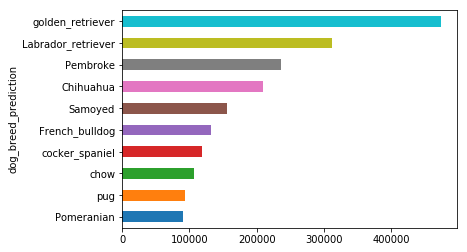

In [84]:
df_b.tail(10).plot(kind='barh')

In [85]:
# Plot Distribution of breed
df_f=twitter_archive_master.groupby('dog_breed_prediction').sum().sort_values(by='favorites',ascending=True)['favorites']
df_f.tail(10)

dog_breed_prediction
malamute              303813 
pug                   324388 
cocker_spaniel        351113 
chow                  388394 
Samoyed               480627 
French_bulldog        524631 
Chihuahua             667256 
Pembroke              903145 
Labrador_retriever    1036371
golden_retriever      1678128
Name: favorites, dtype: int64

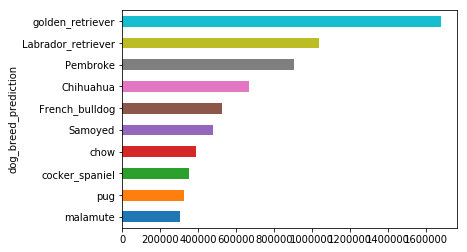

In [86]:
df_f.tail(10).plot(kind='barh')

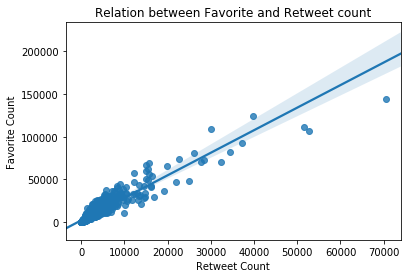

In [87]:
# Plot Relation between Favorite and Retweet count

sns.regplot(x = 'retweet_count', y = 'favorites', data = twitter_archive_master)
plt.title('Relation between Favorite and Retweet count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Text(0,0.5,'Source')

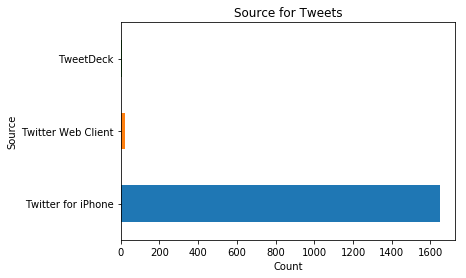

In [88]:
# Plot Distribution of Source 
twitter_archive_master.source.value_counts().plot(kind = 'barh')
plt.title('Source for Tweets')
plt.xlabel('Count')
plt.ylabel('Source')

In [89]:
monthly_tweets_count = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.to_period('M'))['tweet_id'].count()

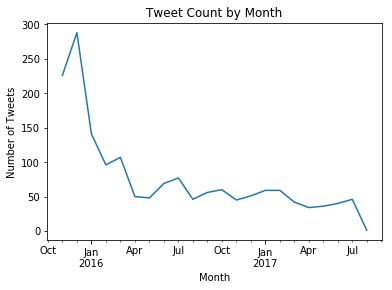

In [90]:
monthly_tweets_count.plot()
plt.title('Tweet Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets');

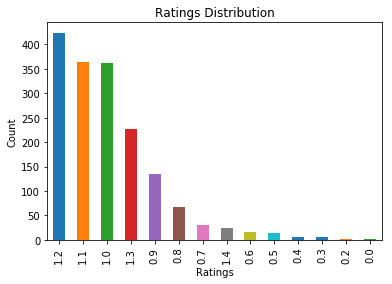

In [91]:
#plot distribution of ratings
twitter_archive_master.ratings.value_counts().plot(kind = 'bar')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count');

In [92]:
twitter_archive_master.name.value_counts().head(10)

Cooper     10
Lucy       9 
Tucker     9 
Charlie    9 
Oliver     9 
Penny      8 
Winston    7 
Sadie      7 
Daisy      7 
Koda       6 
Name: name, dtype: int64

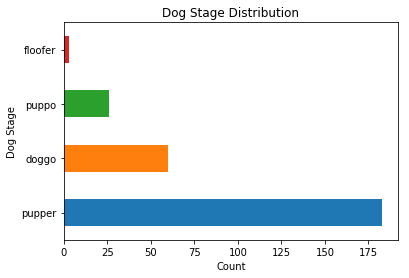

In [93]:
# Plot Most number of Dog stage
twitter_archive_master.dog_stage.value_counts().plot(kind = 'barh')
plt.title('Dog Stage Distribution')
plt.xlabel('Count')
plt.ylabel('Dog Stage');

### Insight  


    The mean of ratings is 1.0829, the max rating is 1.4 , the tweet has an average 7977 favorite and 2274 retweet The confidence machine learning model has a mean a 54% to detect dogs.
    
    Top dogs with higher favorite count and retweet count has a higher rating of 1.3 or 1.4.
    
    Most of the tweets over 90% of them are sent via iPhone, next by Web and very few by TweetDeck.
    
    Among the Dog stages, pupper has the highest frequency, followed by doggo puppo and flotter
    
    
    There is a positive correlation between number of retweets and favorite count. The more the post id retweeted the more eyes on it and the more favorites.
    